In [3]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
% matplotlib inline

In [4]:
iris=sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa


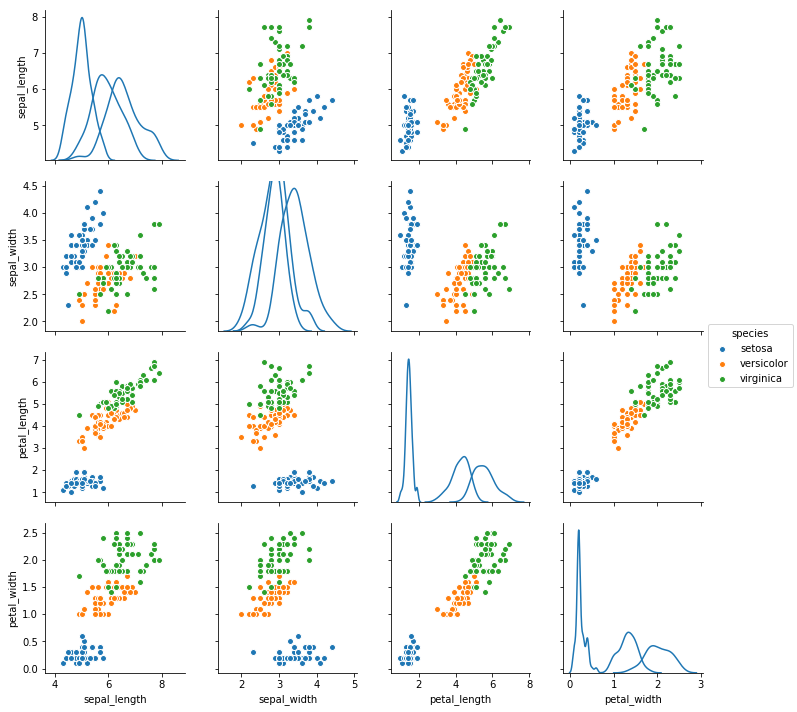

In [5]:
sns.pairplot(iris ,hue = 'species', diag_kind='kde')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
columns = ['petal_width', 'species']
species = ['setosa','versicolor']
data =iris[columns]
data= data.loc[data['species'].isin(species)]


In [8]:
data.head(10)

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa
5,0.4,setosa
6,0.3,setosa
7,0.2,setosa
8,0.2,setosa
9,0.1,setosa


In [9]:
encoder = LabelEncoder()
data['species']=encoder.fit_transform(data['species'])

In [10]:
data.head(10)

,petal_width,species
0,0.2,0
1,0.2,0
2,0.2,0
3,0.2,0
4,0.2,0
5,0.4,0
6,0.3,0
7,0.2,0
8,0.2,0
9,0.1,0


In [11]:

data.tail(5)

,petal_width,species
95,1.2,1
96,1.3,1
97,1.3,1
98,1.1,1
99,1.3,1


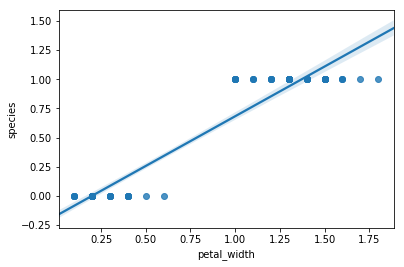

In [12]:
sns.regplot(x='petal_width', y='species',data=data)


In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def logit(x):
    return np.log(x)-np.log(1-x)

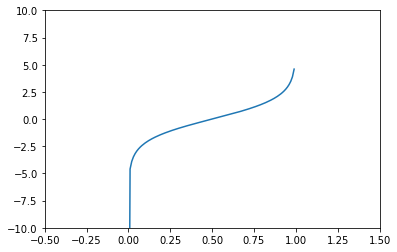

In [15]:
x=np.arange(-1,1,0.01)
ax=plt.gca()
ax.set_xlim([-0.5,1.5])
ax.set_ylim([-10,10])
plt.plot(x,logit(x))

In [16]:
def logistic(x,max=1,mid=0.5,steepness=1):
    return max/(1+np.exp(-steepness *(x-mid)))

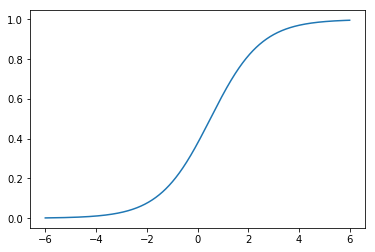

In [17]:
x=np.arange(-6,6,0.01)
plt.plot(x,logistic(x))

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X=np.reshape(data['petal_width'],(len(data['petal_width']),1))
y=np.reshape(data['species'],(len(data['species']),1))

In [20]:
lr =LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
beta0=lr.intercept_[0]
beta0

-2.6988464110059316

In [22]:
beta1=lr.coef_[0,0]
beta1

3.8482411827828757

In [23]:
def predict_prob(x):
    exponent = np.exp(beta0 + beta1 * x)
    
    return exponent / (1 + exponent)

In [29]:
def odds(x):
    return x / (1 - x)

In [30]:
import prettytable as pt
from IPython.core.display import display, HTML

In [31]:
table = pt.PrettyTable(['petal_width', '$\hat{p}$', '$1 - \hat{p}$', 'adds'])
sample =pd.concat([data['petal_width'].head(5), data['petal_width'].tail(5)])


for i in sample:
    p=np.round(predict_prob(i), 2)
    
    table.add_row([i, p, 1-p, odds(p)])
    
display(HTML(table.get_html_string()))

petal_width,$\hat{p}$,$1 - \hat{p}$,adds
0.2,0.13,0.87,0.149425287356
0.2,0.13,0.87,0.149425287356
0.2,0.13,0.87,0.149425287356
0.2,0.13,0.87,0.149425287356
0.2,0.13,0.87,0.149425287356
1.2,0.87,0.13,6.69230769231
1.3,0.91,0.09,10.1111111111
1.3,0.91,0.09,10.1111111111
1.1,0.82,0.18,4.55555555556
1.3,0.91,0.09,10.1111111111
